# Linear, 1-parameter ($y=mx$)

Code is presented below as sequential code in a single cell or a function, with example usage on the latter provided

### Sequential code in a single cell (linear, 1-parameter)

Slope is 0.9823165593517751 +/- 0.03916819669495058

Goodness of fit - Chi-squared measure:
degrees of freedom = 10, Chi2 = 11.27064675102827, Chi2/dof = 1.127064675102827



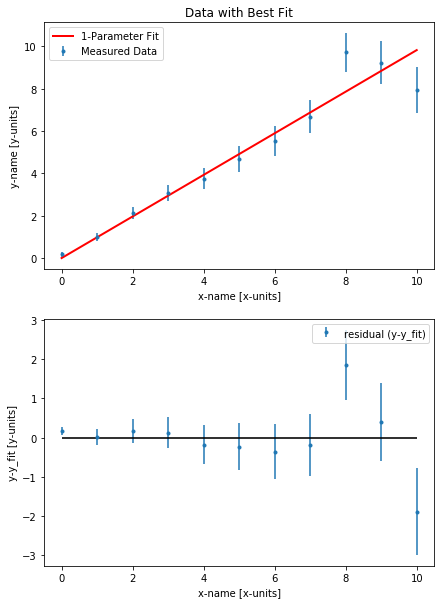

In [2]:
# Simplified code for linear model fit with just y-unc, 1-parameter (slope)
# A fit to a linear model has an analytical solution, with different solutions depending on 
# whether it is a 1-parameter model (slope, assume intercept=0) or a 2- parameter model (slope, intercept)

import math
import numpy as np
import matplotlib.pyplot as plt

#LIST OF ALL INPUTS

# fname is assumed to be a .csv file (comma separated values). All rows 
# containing non-number text (example: names for each column) must begin 
# with "#". The .csv file must be in the sam`e 
# folder as this fit program, otherwise the full file extension must be added
# to fname: e.g. fname = 'folder/subfolder/subsubfolder/file.csv'
fname = 'test_data_linear.csv'
# the data file fname has x data (first column), uncertainty in x data,
# and y data (third column) and 
# the uncertianty in y (third column).
# Enter the name and units of each column here so that the plots are properly
# labeled. e.g. x_name = 'Time', x_units = 'sec', y_name = 'Position', y_units
# = 'metres'.
x_name = 'x-name'
x_units = 'x-units'
y_name = 'y-name'
y_units = 'y-units'

###############################################################################
# loads data, calculates best fit
###############################################################################

# definition of the fit function
def fit_function(x, m):
    return  m*x
    
#load the file "fname", defined above
data = np.loadtxt(fname, delimiter=',', comments='#',usecols=(0,1,2,3))
# access the data columns and assign variables x,y  and  y_sigma
# THIS IS WHERE YOU DEFINE THE X, Y, AND Y-UNCERTAINTY
# CHANGE DEFINITIONS IF YOU ARE FITTING RE-SCALED DATA (eg. LOG-LOG OR OTHER RESCALING) 
x = data[:,0]
y = data[:,2]
#y_sigma = data[:,3]
y_sigma = data[:,3]
# define an array of points  used or plotting the theory function
x_fitfunc=np.linspace(min(x),max(x),500)
    
# calculate the best fit slope analytically (1-parameter solution)
m = sum(x*y/y_sigma**2)/sum((x/y_sigma)**2)

# calculate uncertainty of the best fit slope
m_sigma = math.sqrt(1/sum((x/y_sigma)**2))

print ("Slope is", m, "+/-", m_sigma)
    
                        
###############################################################################
# Calculates and prints the chi-squared, degrees of freedon, and weighted chi-squared
###############################################################################

# function that  calculates the chi square value of a fit
def chi_square (param, x, y, sigma):
    return np.sum((y-fit_function(x, param))**2/sigma**2)
    
# calculate and print chi square as well as the per degree-of-freedom value
chi2 = chi_square(m,x,y,y_sigma)
dof = len(x) - 1
print ("\nGoodness of fit - Chi-squared measure:")
print ("degrees of freedom = {}, Chi2 = {}, Chi2/dof = {}\n".format(dof, chi2, chi2/dof))

      
###############################################################################
# plots the data and the fit curve, plus a plot of residuals
###############################################################################
# code is set to make a dual plot with plot1 showing data and best fit model, plot2 showing residuals

# y_fitfunc is the curve using the parameters calculated from the fit
#x_fit = np.linspace(min(f),max(f),len(f))
y_fitfunc = fit_function(x_fitfunc, m)
# plots y, and y_fit on the same plot.
# marker='.' : data points are not indicated by markers
# linestyle= '-' : a continuous line is drawn
# linewidth=2 : the line thickness is set to 2
# color='r' : the color of the line is set to red
# label=string : the string is shown in the legend

fig=plt.figure(figsize=(7,10))

# plot the data and best fit
plot1=fig.add_subplot(2,1,1)
plot1.errorbar(x,y,yerr=y_sigma,marker='.',linestyle='',label="Measured Data")
plot1.plot(x_fitfunc,y_fitfunc,marker="",linestyle="-",linewidth=2,color="r",
         label="1-Parameter Fit")
# add axis labels and title
plot1.set_xlabel('{} [{}]'.format(x_name,x_units))
plot1.set_ylabel('{} [{}]'.format(y_name,y_units))
plot1.set_title('Data with Best Fit')
# set the x and y boundaries of your plot
#plot1.xlim(lower_x,upper_x)
#plot1.ylim(lower_y,upper_y)
# show a legend. loc='best' places legend where least amount of data is 
# obstructed. 
plot1.legend(loc='best',numpoints=1)


# residual is the difference between the data and theory
y_fit=fit_function(x,m)
residual = y-y_fit
#calculate normalized residuals
normresidual=residual/y_sigma

# this code plots the residuals
plot2 = fig.add_subplot(212)
plot2.errorbar(x,residual,yerr=y_sigma,marker='.',linestyle='',
             label="residual (y-y_fit)")
plot2.hlines(0,np.min(x),np.max(x),lw=2,alpha=0.8)
plot2.set_xlabel('{} [{}]'.format(x_name,x_units))
plot2.set_ylabel('y-y_fit [{}]'.format(y_units))
plot2.legend(loc='best',numpoints=1)

plt.show()

### Function (linear, 1-parameter)

In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt

def fit_linear_1p(
    fname, 
    x_name='x-name', x_units='x-units', y_name='y-name', y_units='y-units',
    graph_title='Data with Best Fit', data_label='Measured Data'
):
    """
    Fits a linear model to the data in the specified CSV file, producing a best-fit and residuals plots
    as well as fit parameters and goodness of fit measures.

    Parameters:
    - fname (str): The filename of the CSV file containing the data.
    - x_name (str): Name of the x column (optional).
    - x_units (str): Units of the x column (optional).
    - y_name (str): Name of the y column (optional).
    - y_units (str): Units of the y column (optional).

    Returns:
    - slope (float): The slope of the linear fit.
    - slope_uncertainty (float): The uncertainty in the slope.
    - chi2 (float): The chi-squared value of the fit.
    - dof (int): Degrees of freedom.
    """

    # Load data from the CSV file
    data = np.loadtxt(fname, delimiter=',', comments='#', usecols=(0, 1, 2, 3))

    # Extract data columns (note that dx is not used)
    x = data[:, 0]
    y = data[:, 2]
    y_sigma = data[:, 3]

    # Define the fit function
    def fit_function(x, m):
        return m * x

    # Calculate the best fit slope analytically (1-parameter solution)
    m = sum(x * y / y_sigma**2) / sum((x / y_sigma)**2)

    # Calculate uncertainty of the best fit slope
    m_sigma = math.sqrt(1 / sum((x / y_sigma)**2))

    print("Slope is", m, "+/-", m_sigma)

    # Calculate and print the chi-squared, degrees of freedom, and weighted chi-squared
    def chi_square(param, x, y, sigma):
        return np.sum((y - fit_function(x, param))**2 / sigma**2)

    chi2 = chi_square(m, x, y, y_sigma)
    dof = len(x) - 1
    print("\nGoodness of fit - Chi-squared measure:")
    print("degrees of freedom = {}, Chi2 = {}, Chi2/dof = {}\n".format(dof, chi2, chi2 / dof))

    # Plot the data and the fit curve, plus a plot of residuals
    x_fitfunc = np.linspace(min(x), max(x), 500)
    y_fitfunc = fit_function(x_fitfunc, m)

    fig = plt.figure(figsize=(7, 10))

    # Plot the data and best fit
    plot1 = fig.add_subplot(2, 1, 1)
    plot1.errorbar(x, y, yerr=y_sigma, marker='.', linestyle='', label=data_label)
    plot1.plot(x_fitfunc, y_fitfunc, marker="", linestyle="-", linewidth=2, color="r", label="1-Parameter Linear Fit")
    plot1.set_xlabel('{} [{}]'.format(x_name, x_units))
    plot1.set_ylabel('{} [{}]'.format(y_name, y_units))
    plot1.set_title(graph_title)
    plot1.legend(loc='best', numpoints=1)

    # Calculate and plot residuals
    y_fit = fit_function(x, m)
    residual = y - y_fit
    norm_residual = residual / y_sigma

    # Plot residuals
    plot2 = fig.add_subplot(212)
    plot2.errorbar(x, residual, yerr=y_sigma, marker='.', linestyle='', label="residual (y-y_fit)")
    plot2.hlines(0, np.min(x), np.max(x), lw=2, alpha=0.8)
    plot2.set_xlabel('{} ({})'.format(x_name, x_units))
    plot2.set_ylabel('y-y_fit ({})'.format(y_units))
    plot2.legend(loc='best', numpoints=1)

    plt.show()

    return m, m_sigma, chi2, dof

### Example usage

Slope is 0.9823165593517751 +/- 0.03916819669495058

Goodness of fit - Chi-squared measure:
degrees of freedom = 10, Chi2 = 11.27064675102827, Chi2/dof = 1.127064675102827



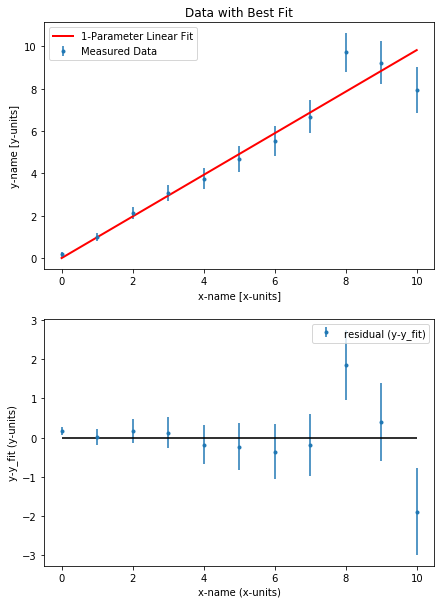

In [10]:
# Providing only the name of the data file
slope, slope_uncertainty, chi2, dof = fit_linear_1p('test_data_linear.csv')

Slope is 0.9823165593517751 +/- 0.03916819669495058

Goodness of fit - Chi-squared measure:
degrees of freedom = 10, Chi2 = 11.27064675102827, Chi2/dof = 1.127064675102827



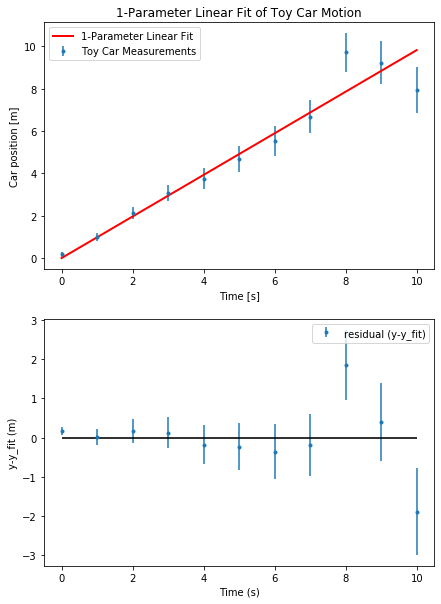

In [11]:
# Providing the name of the data file and additional information
slope, slope_uncertainty, chi2, dof = fit_linear_1p(
    'test_data_linear.csv',
    x_name='Time', x_units='s', y_name='Car position', y_units='m',
    graph_title='1-Parameter Linear Fit of Toy Car Motion',
    data_label='Toy Car Measurements'
)